<a href="https://colab.research.google.com/github/Pinokcio/ML_Study/blob/main/practice/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dacon - 펭귄 몸무게 예측 경진대회
https://dacon.io/competitions/official/235862/overview/description


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive') #google drive 마운팅

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/dacon_4/train.csv", index_col = 'id') #id기준으로 csv를 불러옴

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


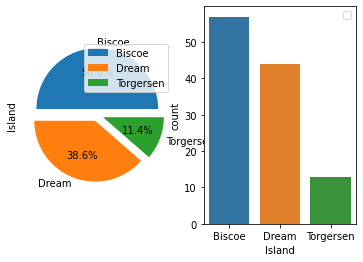

In [ ]:
f, ax = plt.subplots(1,2)
train['Island'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0])
sns.countplot('Island', data=train, order=train['Island'].value_counts().index, ax=ax[1])
ax[0].legend()
ax[1].legend()
#펭귄이 사는 지역에 따른 수

In [ ]:
train['Species'] = train['Species'].replace(train['Species'].value_counts().index, range(len(train['Species'].value_counts().index)))
train['Island'] = train['Island'].replace(train['Island'].value_counts().index, range(len(train['Island'].value_counts().index)))
train['Sex'] = train['Sex'].replace(train['Sex'].value_counts().index, range(len(train['Sex'].value_counts().index)))
train['Clutch Completion'] = train['Clutch Completion'].replace(train['Clutch Completion'].value_counts().index, range(len(train['Clutch Completion'].value_counts().index)))
train['Clutch Completion'] = train['Clutch Completion'].replace(train['Clutch Completion'].value_counts().index, range(len(train['Clutch Completion'].value_counts().index)))
# str -> index, 문자로 구분되어있는 값을 숫자로 인코딩

In [ ]:
train_t = pd.melt(train, id_vars = 'Body Mass (g)', var_name = 'feature', value_name = 'value')
#body mass를 다른 feature들에 대해 나타냄

In [ ]:
train_t

,Body Mass (g),feature,value
0,5550,Species,0.00000
1,3800,Species,2.00000
2,4400,Species,0.00000
3,4850,Species,0.00000
4,5700,Species,0.00000
...,...,...,...
1021,3700,Delta 13 C (o/oo),NaN
1022,4250,Delta 13 C (o/oo),-25.79549
1023,4100,Delta 13 C (o/oo),-26.03679
1024,2700,Delta 13 C (o/oo),-24.73735


In [ ]:
"""plt.figure(figsize=(30, 30))
sns.boxplot(x="value", y="Body Mass (g)", hue = "feature", data=train_t)
plt.xticks(rotation=90)"""

In [ ]:
data_mass = train['Body Mass (g)']
data = train.drop(['Body Mass (g)'], axis = 1)
data_n_2 = (data - data.mean())/data.std() #정규화
data = pd.concat([data_mass, data_n_2], axis = 1)
train_t_n_2 = pd.melt(data, id_vars='Body Mass (g)', var_name='features', value_name='value')
print(train_t_n_2)

      Body Mass (g)           features     value
0              5550            Species -1.026304
1              3800            Species  1.545094
2              4400            Species -1.026304
3              4850            Species -1.026304
4              5700            Species -1.026304
...             ...                ...       ...
1021           3700  Delta 13 C (o/oo)       NaN
1022           4250  Delta 13 C (o/oo) -0.084252
1023           4100  Delta 13 C (o/oo) -0.364903
1024           2700  Delta 13 C (o/oo)  1.146449
1025           5600  Delta 13 C (o/oo) -0.671259

[1026 rows x 3 columns]


In [ ]:
"""plt.figure(figsize=(30, 50))
sns.violinplot(x="features", y="value", hue="Body Mass (g)", data=train_t_n_2)
plt.xticks(rotation=90)"""

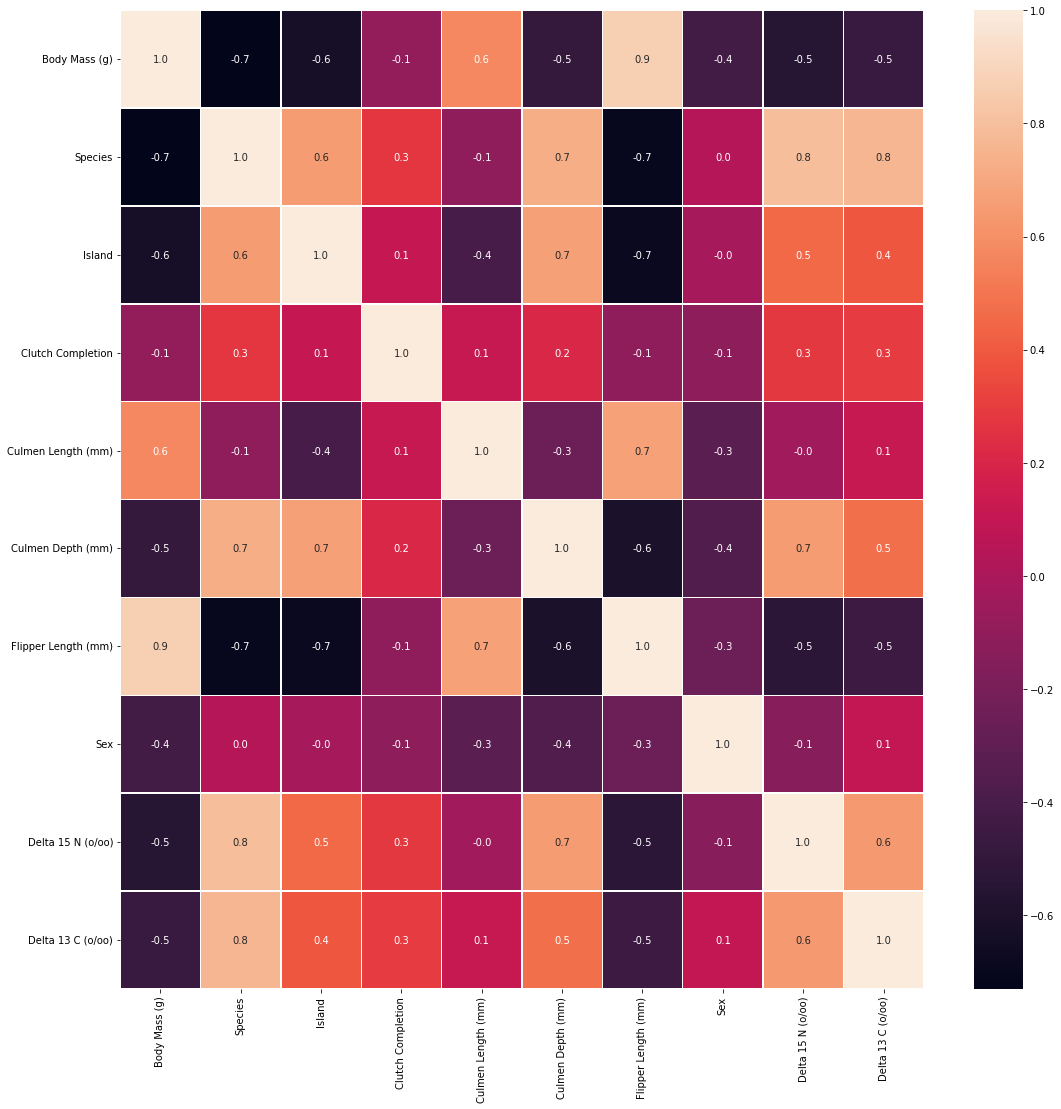

In [ ]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)
# 상관계수 출력, 상관성이 크면 학습 시 제외 고려 가능
# 날개와 가장 연관이 깊으며, 종도 영향이 있음. 그 외에는 모두 비슷

In [ ]:
temp = train.copy()
temp.loc[train[train['Sex'].isna()][train['Culmen Length (mm)']>=45]['Sex'].index, 'Sex'] = '0'
temp.loc[train[train['Sex'].isna()][train['Culmen Length (mm)']<45]['Sex'].index, 'Sex'] = '1'
temp.loc[train[train['Delta 15 N (o/oo)'].isna()].index,'Delta 15 N (o/oo)'] = train['Delta 15 N (o/oo)'].mean()
temp.loc[train[train['Delta 13 C (o/oo)'].isna()].index,'Delta 13 C (o/oo)'] = train['Delta 13 C (o/oo)'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
temp
#결측치를 채워줌

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,,,,,,,,,,
0,0,0,0,50.0,15.3,220,0.0,8.305150,-25.190170,5550
1,2,1,1,49.5,19.0,200,0.0,9.630740,-24.346840,3800
2,0,0,0,45.1,14.4,210,1.0,8.519510,-27.018540,4400
3,0,0,0,44.5,14.7,214,1.0,8.201060,-26.165240,4850
4,0,0,1,49.6,16.0,225,0.0,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,1,2,0,36.6,17.8,185,1.0,8.737634,-25.723051,3700
110,1,1,0,39.2,18.6,190,0.0,9.110060,-25.795490,4250
111,1,1,0,43.2,18.5,192,0.0,8.970250,-26.036790,4100


In [ ]:
np.unique(train['Island'].values, return_counts = True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([57, 44, 13]))

In [ ]:
print(train[train['Island'] == 'Biscoe']['Body Mass (g)'].mean()
,train[train['Island'] == 'Dream']['Body Mass (g)'].mean()
,train[train['Island'] == 'Torgersen']['Body Mass (g)'].mean())
# 지역별 펭귄의 몸무게

4878.9473684210525 3764.7727272727275 3817.3076923076924


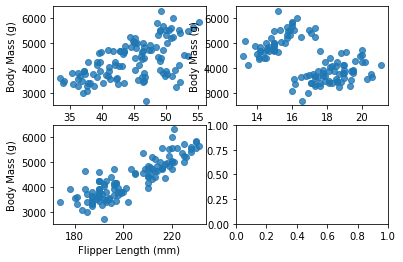

In [ ]:
fig, ax = plt.subplots(2,2)
sns.regplot(x='Culmen Length (mm)', y='Body Mass (g)', data=train, fit_reg=False , ax=ax[0][0]) #부리 길이
sns.regplot(x = 'Culmen Depth (mm)', y = 'Body Mass (g)', data = train, fit_reg=False , ax=ax[0][1]) #부리 높이
ax = sns.regplot(x='Flipper Length (mm)', y='Body Mass (g)', data=train, fit_reg=False , ax= ax[1][0]) #날개 길이
# 날개 길이가 가장 비례성이 강한 모습

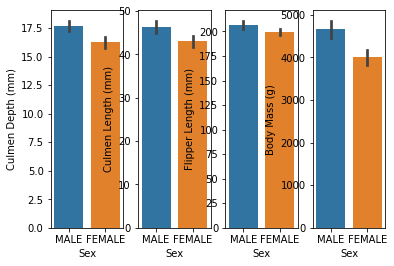

In [ ]:
fig, ax = plt.subplots(1,4)
sns.barplot(x = 'Sex', y='Culmen Depth (mm)', data = train, ax = ax[0])
sns.barplot(x = 'Sex', y='Culmen Length (mm)', data = train, ax = ax[1])
sns.barplot(x = 'Sex', y='Flipper Length (mm)', data = train, ax = ax[2])
sns.barplot(x = 'Sex', y='Body Mass (g)', data = train, ax = ax[3])
# 수컷이 평균적으로 신체가 크며, 질량 또한 비례함

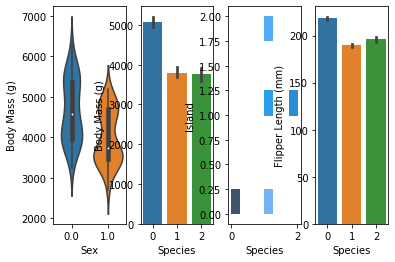

In [ ]:
fig, ax = plt.subplots(1,4)
sns.violinplot(x = 'Sex', y='Body Mass (g)', data = train, ax = ax[0])
sns.barplot(x = 'Species', y='Body Mass (g)', data = train, ax = ax[1])
sns.histplot(x = 'Species', y='Island', data = train, ax = ax[2])
sns.barplot(x = 'Species', y='Flipper Length (mm)', data = train, ax = ax[3])

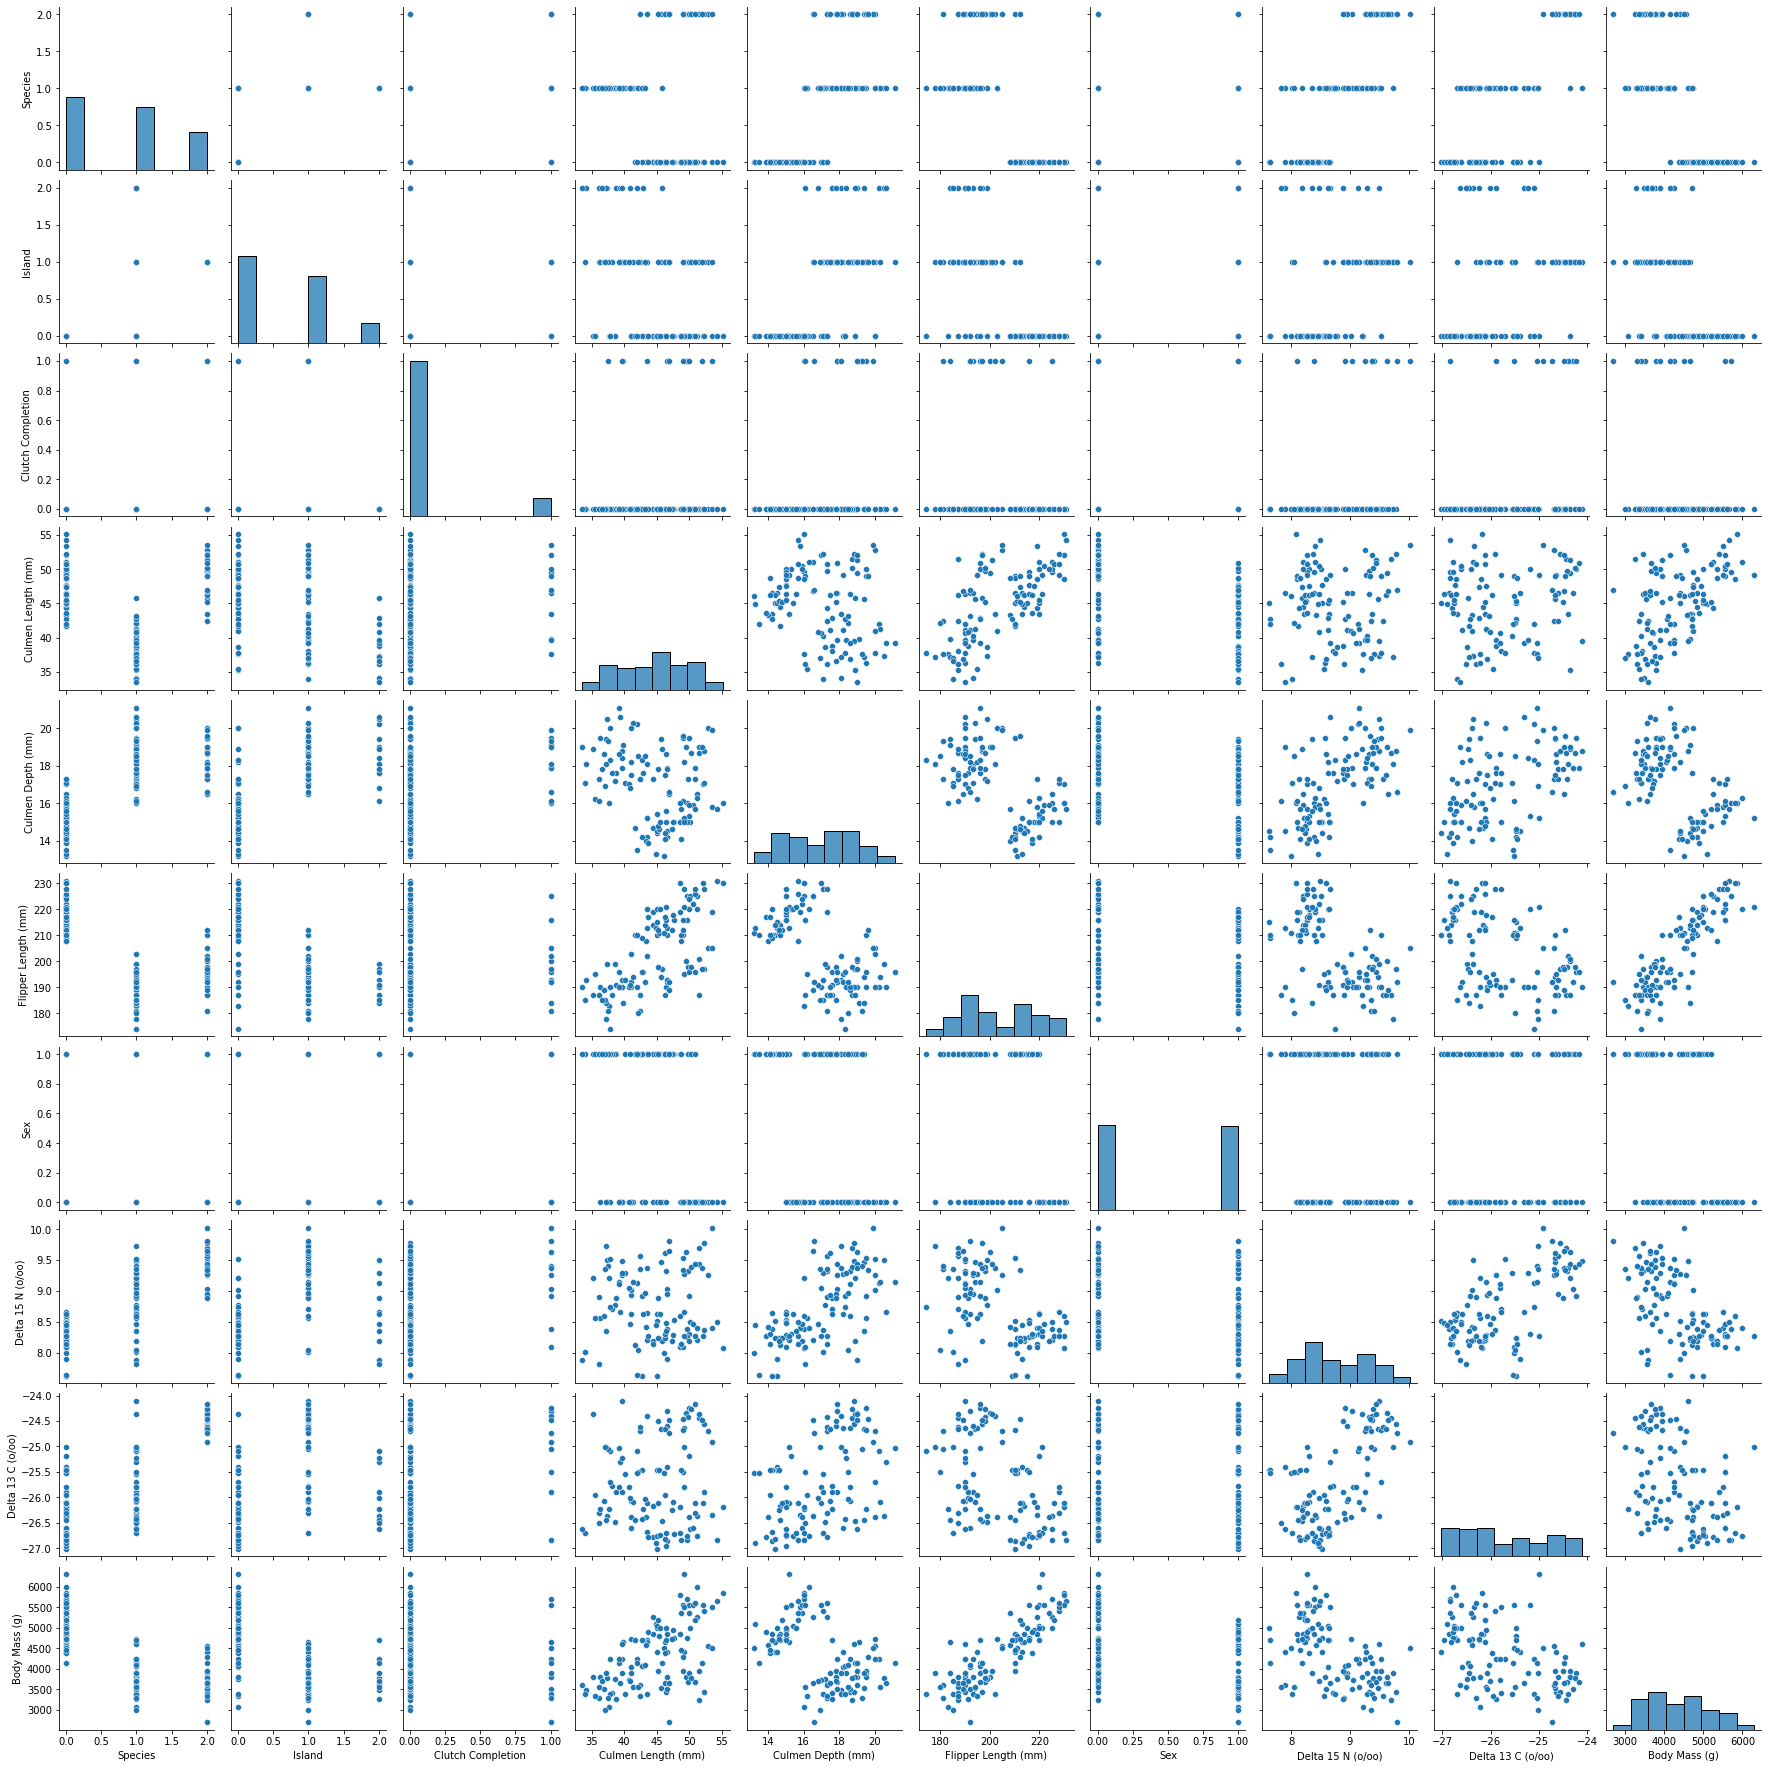

In [ ]:
sns.pairplot(train)
#전체적으로 신체의 크기와 가장 연관있음.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

temp = temp[['Flipper Length (mm)', 'Body Mass (g)']]
scaler = MinMaxScaler() #plot 상으로 보이는 이상치가 크지 않으므로 minmax 
temp[:] = scaler.fit_transform(temp[:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


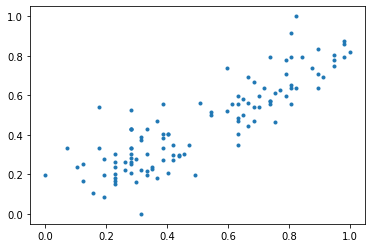

In [ ]:
plt.scatter(temp['Flipper Length (mm)'], temp['Body Mass (g)'], marker='.')
plt.show()

In [ ]:
k = 2
dbscan = DBSCAN(eps = 0.1, min_samples = 5)
y_pred = dbscan.fit_predict(temp)
temp['y_pred'] = y_pred
print(y_pred)

[ 0  1  0  0  0  0  1  1  1  0  0  1  0  0  1  0  0  1 -1  1  1  1  0  1
  1  1  1  1  1  1  1  1  1  1  1  0  0  0  1  1  0  1  1  1  1  0  1  0
  0  0  1  1  1  1  1  0  0  1  1 -1  0  0  1  1  1  1  0 -1 -1  0  0  0
  0  0  1  0  1  1  0  1  1  1  0  0  0  0  1  1  1  0  1  1  0  0  0  0
  0  1  0  0  0  0  1 -1  0  1  0  1  0  1  1  1 -1  0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


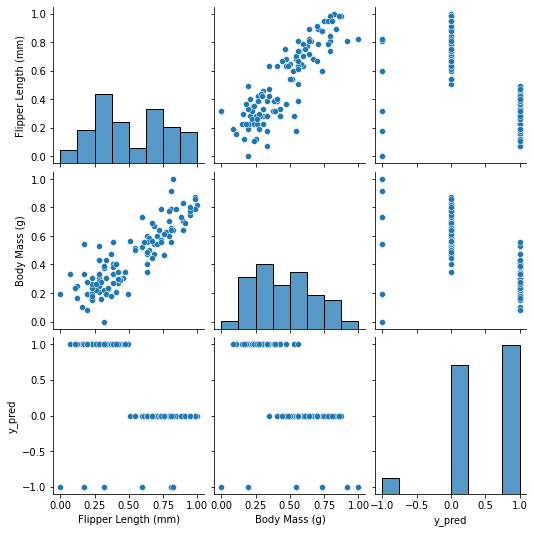

In [ ]:
sns.pairplot(temp)

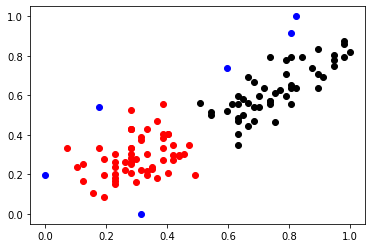

In [ ]:
#filter rows of original data
filtered_label1 = temp[y_pred == 1]
 
filtered_label0 = temp[y_pred == 0]
filtered_labelm1 = temp[y_pred == -1]
 
plt.scatter(filtered_label1[:]['Flipper Length (mm)'] , filtered_label1[:]['Body Mass (g)'] , color = 'red')
plt.scatter(filtered_labelm1[:]['Flipper Length (mm)'] , filtered_labelm1[:]['Body Mass (g)'] , color = 'blue')
plt.scatter(filtered_label0[:]['Flipper Length (mm)'] , filtered_label0[:]['Body Mass (g)'] , color = 'black')
plt.show()